In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# lets merge them because we doing feature engineering 
titanic_train = pd.read_csv("C:\\Users\\andre\\OneDrive\\Desktop\\Personal\\Data Science\\Training\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\titanic_train.csv")

In [101]:
import os 
os.listdir("C:\\Users\\andre\\OneDrive\\Desktop\\Personal\\Data Science\\Training\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\")

['01-Logistic Regression with Python.ipynb',
 '02-Logistic Regression Project.ipynb',
 '03-Logistic Regression Project - Solutions.ipynb',
 'advertising.csv',
 'titanic_test.csv',
 'titanic_train.csv']

In [103]:
df_titanic.shape

(1309, 12)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

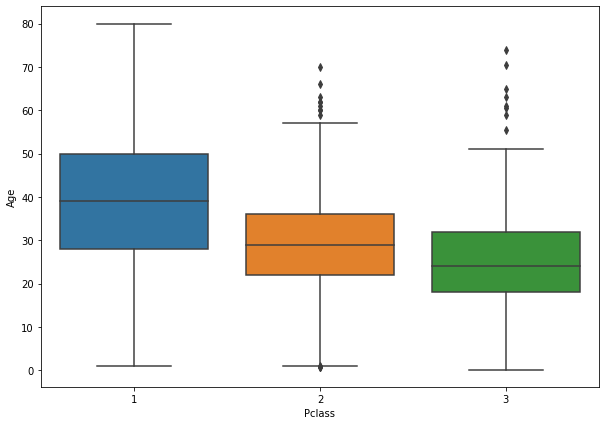

In [104]:
plt.figure(figsize=(10,7))
sns.boxplot(data = df_titanic, x= "Pclass",y= "Age")

<AxesSubplot:>

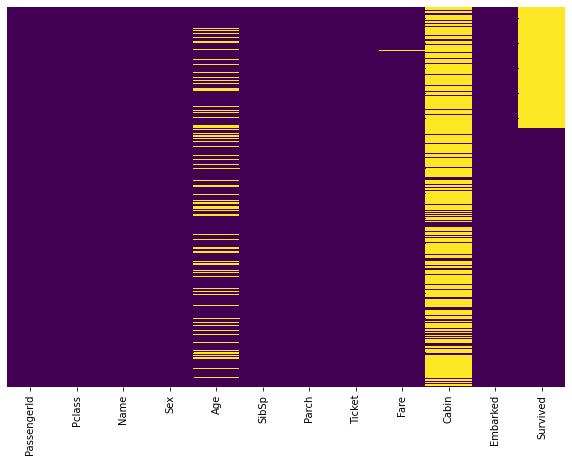

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(df_titanic.isnull(),cbar=False,yticklabels=False,  cmap = "viridis")

In [106]:
titanic_train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [107]:
def age_imput(age_pclass):
    
    if pd.isnull(age_pclass[0]):
        
        if age_pclass[1]==1:
            return titanic_train.groupby("Pclass")["Age"].mean()[1]
        if age_pclass[1]==2:
            return titanic_train.groupby("Pclass")["Age"].mean()[2]
        else:
            return titanic_train.groupby("Pclass")["Age"].mean()[3]
    else:
        return age_pclass[1]
    

In [108]:
titanic_train["Age"] = titanic_train[["Age","Pclass"]].apply(age_imput,axis=1)

<AxesSubplot:>

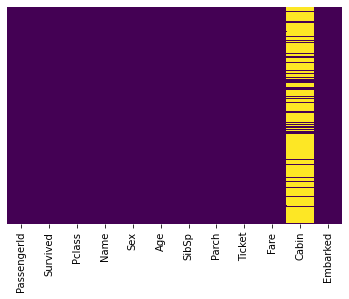

In [109]:
sns.heatmap(titanic_train.isnull(),cbar=False,yticklabels=False,  cmap = "viridis")

In [110]:
# too many Cabin null values

In [111]:
titanic_train = titanic_train.drop("Cabin", axis = 1)

<AxesSubplot:>

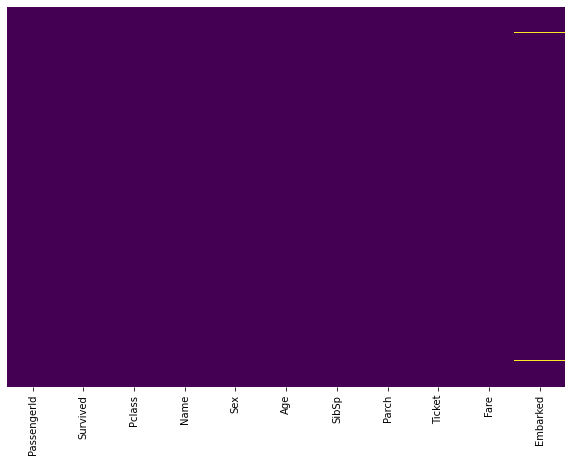

In [112]:
plt.figure(figsize=(10,7))
sns.heatmap(titanic_train.isnull(),cbar=False,yticklabels=False,cmap = "viridis")

In [113]:
## Embarked 
titanic_train[pd.isnull(titanic_train["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,1.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,1.0,0,0,113572,80.0,NaN


In [114]:
titanic_train["Embarked"] =titanic_train["Embarked"].apply(lambda x: titanic_train["Embarked"].mode()[0] if pd.isnull(x) else x)

In [115]:
titanic_train[pd.isnull(titanic_train["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# Onehotencoding / dummies 

#### pandas

In [116]:
pd.get_dummies(titanic_train["Sex"], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [117]:
titanic_train["Embarked"].tail()

886    S
887    S
888    S
889    C
890    Q
Name: Embarked, dtype: object

In [118]:
df_sex = pd.get_dummies(titanic_train["Sex"], drop_first=True)
df_pclass = pd.get_dummies(titanic_train["Pclass"],drop_first=True)
df_embarked = pd.get_dummies(titanic_train["Embarked"],drop_first=True)

In [119]:
df_titanic = pd.concat([titanic_train,df_pclass,df_sex,df_embarked],axis = 1)

In [120]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,S,0,1,1,0,1


In [121]:
#we can do fancy things with the Name and ticket but lets ignore for now 
df_titanic.drop(["Pclass","Sex","Ticket","Name","PassengerId","Embarked"],axis =1,inplace=True)

In [122]:
df_titanic.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,3.0,1,0,7.2500,0,1,1,0,1
1,1,1.0,1,0,71.2833,0,0,0,0,0
2,1,3.0,0,0,7.9250,0,1,0,0,1
3,1,1.0,1,0,53.1000,0,0,0,0,1
4,0,3.0,0,0,8.0500,0,1,1,0,1


### Model Training and Prediction  

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
y = df_titanic["Survived"]
X = df_titanic.drop(["Survived"], axis = 1)

In [125]:
logReg = LogisticRegression()

In [126]:
logReg.fit(X,y)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### prediction

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
logReg = LogisticRegression()

In [133]:
logReg.fit(X,y)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
y_pred = logReg.predict(X_test)

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.76      0.70      0.73       120

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
confusion_matrix(y_test,y_pred)

array([[149,  26],
       [ 36,  84]], dtype=int64)

In [ ]:
## pretty decent 
## ways to improve 

###### supervised learning on null values 
###### use the droped columns - NLP? name: extract titles, length Ticket:??